## a-AlphaBio homework 
### Run inference with some of the trained models
### Mark Thompson
### Started April 29, 2024 

In [1]:
%load_ext autoreload

In [2]:
%autoreload
# import libraries
import numpy as np
import pickle as pk
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline


---------
### Holdout dataset

In [ ]:
# The holdout data
data_file = './data/alphaseq_data_hold_out.csv'
df = pd.read_csv(data_file)
rows1 = df.shape[0]
print('holdout dataframe has', rows1, 'rows')
print(df.columns.tolist())
print(df['sequence_a'].describe())

In [3]:
import torch
import torch.nn as nn

# Some plotting functions
#
def plot_preds_hist(preds_file_path):
    preds = pk.load(open(preds_file_path, 'rb'))
    print('len(preds):', len(preds))
    preds = [p[0] for p in preds]
    print('preds[0:10]:', preds[0:10])

    # Histogram of predicted values
    plt.hist(preds, bins=100)
    plt.xlabel('pred Kd (nm)')
    plt.ylabel('count')
    plt.title('Distribution of pred values on holdout set')
    plt.show()


def plot_pred_vs_true(preds_file_path, true_file_path, xlim=(0,5), ylim=(0,5)):
    preds = pk.load(open(preds_file_path, 'rb'))
    y = pk.load(open(true_file_path, 'rb'))
    print('len(preds):', len(preds), ', len(y):', len(y))
    preds = [p[0] for p in preds]
    y = [a[0] for a in y]

    # scatter plot of true vs pred
    plt.scatter(y, preds, c ="blue")
    plt.xlabel('experimental Kd (nm)')
    plt.ylabel('predicted Kd (nm)')
    plt.title('true vs predicted Kd on validation set')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

# Some error values
def print_errors(preds_file_path, true_file_path):
    preds = pk.load(open(preds_file_path, 'rb'))
    y = pk.load(open(true_file_path, 'rb'))
    print('len(preds):', len(preds), ', len(y):', len(y))
    preds = [p[0] for p in preds]
    y = [a[0] for a in y]

    # RMSE
    rmse = math.sqrt(np.mean((np.array(y) - np.array(preds))**2))
    print('rmse:', rmse)

    # MSE
    mse = np.mean((np.array(y) - np.array(preds))**2)
    print('mse:', mse)

    mse2 = nn.MSELoss()(torch.tensor(preds), torch.tensor(y))
    print('mse2:', mse2)

    # MAE
    mae = np.mean(np.abs(np.array(y) - np.array(preds)))
    print('mae:', mae) 

    # Mean and standard deviation of the error
    mean = np.mean(np.array(y) - np.array(preds))
    std = np.std(np.array(y) - np.array(preds))
    print('Error: mean:', mean, ', std:', std)

    # Mean of the absolute percentage error
    mape = np.mean(np.abs(np.array(y) - np.array(preds))/np.array(y))
    print('mape:', mape)

    # Median of the absolute percentage error
    mdape = np.median(np.abs(np.array(y) - np.array(preds))/np.array(y))
    print('mdape:', mdape)

    # PPE10: percentage of time the prediction is within 10 percent of the ground truth
    ppe10 = np.mean(np.abs(np.array(y) - np.array(preds))/np.array(y) < 0.1)
    print('ppe10:', ppe10)

    # PPE20: percentage of time the prediction is within 10 percent of the ground truth
    ppe20 = np.mean(np.abs(np.array(y) - np.array(preds))/np.array(y) < 0.2)
    print('ppe20:', ppe20)

    


----
### MLP model

In [ ]:
pred_file_path = ''
plot_preds_hist(pred_file_path)

len(preds): 694 , len(y): 694
rmse: 0.626284822142152
mse: 0.392232678445627
mse2: tensor(0.3922)
mae: 0.5177037386540377
Error: mean: 0.0946370421208291 , std: 0.6190932956382643
mape: 0.33230624495062616
mdape: 0.2323690723440172
ppe10: 0.21037463976945245
ppe20: 0.4207492795389049
len(preds): 694 , len(y): 694


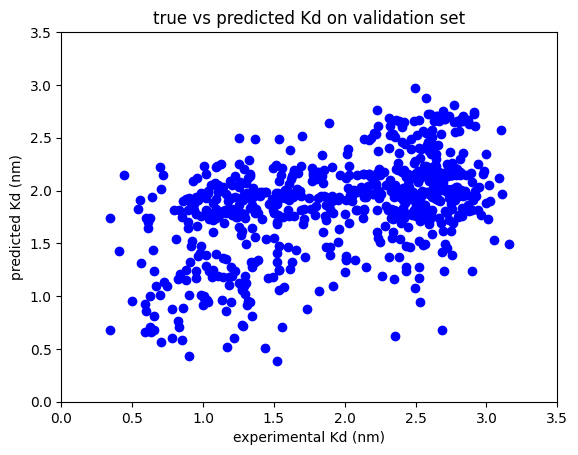

In [7]:
pred_file_path = './inference_results/mlp_model/cleaned-3/test_no_cls_token/preds_mlp_1714982629.5918856.pkl'
true_file_path = './inference_results/mlp_model/cleaned-3/test_no_cls_token/y_mlp_1714982629.5921109.pkl'
print_errors(pred_file_path, true_file_path)
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))

----
### Dense MLP model

In [ ]:
pred_file_path = './inference_results/preds_dense_mlp.pkl'
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = './'
true_file_path = './'
plot_pred_vs_true(pred_file_path, true_file_path)

----
### Residual MLP Clean-3b Dataset

In [ ]:
pred_file_path = ''
plot_preds_hist(pred_file_path)

len(preds): 694 , len(y): 694
rmse: 0.6916396724295882
mse: 0.4783654364785081
mse2: tensor(0.4784)
mae: 0.582503928016517
Error: mean: -0.15613494495665306 , std: 0.6737858082817498
mape: 0.44482606223758603
mdape: 0.2299629574849248
ppe10: 0.19020172910662825
ppe20: 0.43515850144092216
len(preds): 694 , len(y): 694


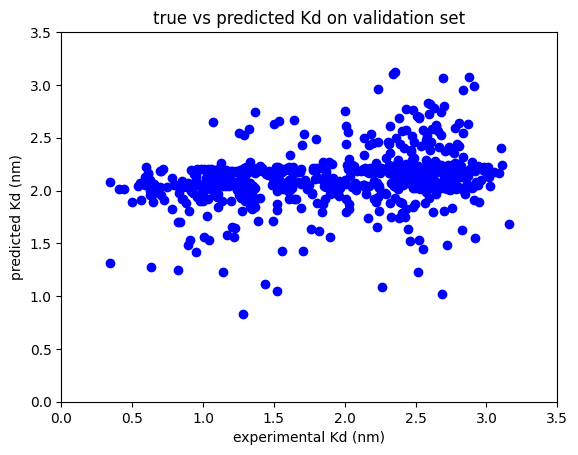

In [6]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = './inference_results/residual_mlp_model/cleaned-3/test_no_cls_token/preds_residual_mlp_1715010322.2054656.pkl'
true_file_path = './inference_results/residual_mlp_model/cleaned-3/test_no_cls_token/y_residual_mlp_1715010322.2057152.pkl'
print_errors(pred_file_path, true_file_path)
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))

-------
### Vision Transform Model (VIT)  1-channel Clean-3b Dataset

In [ ]:
pred_file_path = ''
plot_preds_hist(pred_file_path)

len(preds): 694 , len(y): 694
rmse: 0.4058696594257153
mse: 0.1647301804423461
mse2: tensor(0.1647)
mae: 0.2826049606119865
Error: mean: 0.010464256967522569 , std: 0.4057347406477091
mape: 0.17119467627687335
mdape: 0.09758034191975509
ppe10: 0.5072046109510087
ppe20: 0.7146974063400576
len(preds): 694 , len(y): 694


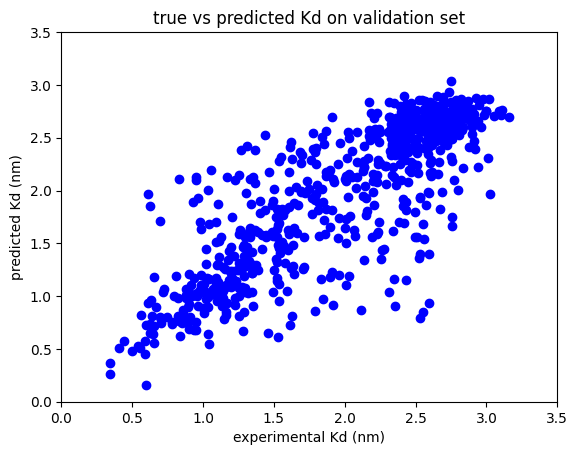

In [9]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = './inference_results/vit_model/cleaned-3b/BW/test_no_cls_token/preds_vit_1715016846.793841.pkl'
true_file_path = './inference_results/vit_model/cleaned-3b/BW/test_no_cls_token/y_vit_1715016846.7940617.pkl'
print_errors(pred_file_path, true_file_path)
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))


----
### Vision Transformer 3-channel,  Clean-3 Dataset

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = './inference_results/vit_model/cleaned-3/BGR/preds_vit_1714883259.9500844.pkl'
true_file_path = './inference_results/vit_model/cleaned-3/BGR/y_vit_1714883259.9503129.pkl'
print_errors(pred_file_path, true_file_path)
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))



----
### TFormMLP model with residualMLP regression head. Clean-3 Dataset 

In [ ]:
pred_file_path = './inference_results/tform_mlp_model/cleaned-3/test_no_cls_token/preds_tform_mlp_1714986859.0914655.pkl'
true_file_path = './inference_results/tform_mlp_model/cleaned-3/test_no_cls_token/y_tform_mlp_1714986859.091691.pkl'
print_errors(pred_file_path, true_file_path)
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))

In [ ]:
# Plot absolute error vs experimental Kd
preds = pk.load(open('', 'rb'))
truth = pk.load(open('', 'rb'))

# scatter plot of true vs pred
plt.scatter(truth, np.abs(np.array(preds)-np.array(truth)), c ="blue")
plt.xlabel('experimental Kd (nm)')
plt.ylabel('absolute error')
plt.title('error vs experimental value on validation set')
# plt.xlim(xlim)
# plt.ylim(ylim)
plt.show()

----
### t-SNE analysis

The transformer-based models should have learned relationships between the elements of the sequence.  See how this appears in t-SNE plots

In [ ]:
from torch.utils.data import DataLoader
from models.tform_mlp.tform_mlp import TFormMLP_Lightning
from datasets.scFv_dataset import scFv_Dataset as dataset
import yaml
import pytorch_lightning as pl
import torch

#----------------------------------------------------------
# Read the config
#----------------------------------------------------------
config_path = './config/tform_mlp_params.yaml'  
with open(config_path, 'r') as file:
    try:
        config = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)

config = config['model_params']
print(config)
pl.seed_everything(config['seed'])



In [ ]:
#----------------------------------------------------------
# Load the dataset and dataloaders
#----------------------------------------------------------
test_dataset = dataset(config, config['test_data_path'], regularize=False)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=config['batch_size'])

#----------------------------------------------------------
# Load pre-trained model
#----------------------------------------------------------
assert config['checkpoint_name'] != 'None'
print('Restarting from checkpoint: ', config['checkpoint_name'])
path = config['checkpoint_name']
model = TFormMLP_Lightning.load_from_checkpoint(checkpoint_path=path, config=config)


In [ ]:
it = iter(test_loader)
batch = next(it)
x, y = batch
print('x shape:', x.shape, ', y shape:', y.shape)

y_hat, trans_out = model(x.to(model.device))
print('y_hat shape:', y_hat.shape, ', trans_out shape', trans_out.shape)

In [ ]:
from einops import repeat

print('trans_out shape:', trans_out.shape)
b, n, d = trans_out.shape
print('b:', b, ', n:', n, ', d:', d)

ctx_labels = torch.arange(0, config['block_size']+1)
# ctx_labels = ctx_labels.unsqueeze(0).unsqueeze(0)
print('ctx_labels shape:', ctx_labels.shape)
# print('ctx_labels:', ctx_labels)

# blah = repeat(ctx_labels, '() n d -> b n d', b = b)
# print('blah shape:', blah.shape)


# Three types of tokens to distinguish in the tsne plot:
# 1. classifier token (used in the regression)
# 2. aa tokens in the CDR region
# 3. all others (including the CLS and PAD tokens)
ctx_cats = torch.ones_like(ctx_labels)  # label everything like it's a non-CDR aa group
ctx_cats[0] = 0  # the classifier token used in regression
ctx_cats[1] = 3  # CLS token added when the sequence was constructed
ctx_cats[29:109] = 2  # the CDR region is aa residues 29-108

print(ctx_cats)

labels = ctx_cats.repeat(config['batch_size'])
print('labels shape:', labels.shape)


In [ ]:
ctx_vectors = torch.reshape(trans_out, (trans_out.shape[0]*trans_out.shape[1], trans_out.shape[2]))
# ctx_labels = torch.arange(0, config['block_size']).repeat
# ctx_labels = torch.reshape(ctx_labels, (ctx_labels.shape[0]*ctx_labels.shape[1], 1))
# ctx_labels = ctx_labels.squeeze()
# ctx_yhat = torch.repeat_interleave(y_hat, len(dvm_schema.get_column_names_encoded()))
# ctx_yhat = ctx_yhat.detach().cpu().numpy()
print('ctx_vectors shape', ctx_vectors.shape)
# print('ctx_labels shape', ctx_labels.shape)
# print('ctx_yhat shape:', ctx_yhat.shape)

# print(ctx_vectors[9])
# print(ctx_labels[9])

In [ ]:
from sklearn.manifold import TSNE
n_iter = 10000

# 2D

tsne = TSNE(n_components=2, random_state=config['seed'], metric="cosine", n_iter=n_iter, verbose=True)
x_tsne = tsne.fit_transform(ctx_vectors.detach().cpu().numpy())
print('x_tsne shape:', x_tsne.shape)
print(tsne.kl_divergence_)


In [ ]:
# pk.dump(x_tsne, open('./misc_analysis/tform_mlp/tsne_x_10000iter_tform_mlp.pkl', 'wb'))

x_tsne = pk.load(open('./misc_analysis/tform_mlp/tsne_x_10000iter_tform_mlp.pkl', 'rb'))

In [ ]:
# df_tsne = pd.DataFrame(x_tsne, columns=['tsne_x', 'tsne_y'])
# df_tsne['ctx_col_idx'] = ctx_labels
# df_tsne['categ_val'] = x_categ

In [ ]:
# Create an array with the colors you want to use
colors = ["#FF0000", "#00FF00", "#0000FF"] # rgb
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create an array with three colors
# colors = ["#FF0000", "#00FF00", "#0000FF", "#000000"] # rgb, black
colors = ["#0000FF", "#A0A0A0", "#FF0000", "#000000"] # rgb, black
# Set custom color palette
my_palette = sns.color_palette(colors)
sns.set_palette(my_palette)

fig, ax = plt.subplots(figsize=(10, 8))
x_all = x_tsne[:, 0] #df_tsne['tsne_x'].values
y_all = x_tsne[:, 1] #df_tsne['tsne_y'].values
cat_all = labels     #df_tsne['categ_val'].values
plt.title('t-SNE of transformer output tensors')  #category_name
ax.set_xlabel("t-SNE y")
ax.set_ylabel("t-SNE x")
p = sns.scatterplot(x=x_all, y=y_all, alpha=0.6, ax=ax, palette=sns.color_palette(my_palette), hue=labels, legend=True)

# title
p.legend_.set_title('Token type')
new_labels = ['regression token', 'aa: non-CDR', 'aa: CDR region (29-108)', 'CLS token in sequence']
for t, l in zip(p.legend_.texts, new_labels):
    t.set_text(l)


In [ ]:
# Set the color palette
sns.set_palette(sns.color_palette("Paired"))
# Plot the data, specifying a different color for data points in
# each of the day categories (weekday and weekend)
ax = sns.scatterplot(x='day', y='miles_walked', data=dataset, hue='day_category')
# Customize the axes and title
ax.set_title("Miles walked")
ax.set_xlabel("day")
ax.set_ylabel("total miles")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()